## Video game sales analyze

- This dataset provides a comprehensive list of video games with sales exceeding 100,000 copies. The data was collected through web scraping from vgchartz.com, ensuring a robust compilation of sales figures for various games across multiple regions and platforms.

## Columns

- Rank: Indicates the global sales ranking of each game.
- Name: Specifies the title of the game.
- Platform: Identifies the platform on which the game was released (e.g., PC, PS4, Xbox One).
- Year: Records the year of the game's release.
- Genre: Categorizes the game based on its genre (e.g., Action, Adventure, RPG).
- Publisher: Lists the company responsible for publishing the game.
- NA_Sales: Sales in North America, measured in millions.
- EU_Sales: Sales in Europe, measured in millions.
- JP_Sales: Sales in Japan, measured in millions.
- Other_Sales: Sales in the rest of the world, measured in millions.
- Global_Sales: Represents the total worldwide sales, aggregating all regional sales.

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("vgsales new.csv")

In [31]:
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,259,Asteroids,2600,1980.0,Shooter,Atari,4.00,0.26,0.0,0.05,4.31
1,545,Missile Command,2600,1980.0,Shooter,Atari,2.56,0.17,0.0,0.03,2.76
2,1768,Kaboom!,2600,1980.0,Misc,Activision,1.07,0.07,0.0,0.01,1.15
3,1971,Defender,2600,1980.0,Misc,Atari,0.99,0.05,0.0,0.01,1.05
4,2671,Boxing,2600,1980.0,Fighting,Activision,0.72,0.04,0.0,0.01,0.77


## Data that needs to be analyzed:

- What company that has the biggest video game sales?
- Which region that brings the biggest sales?
- What is the highest selling video game?
- What is the most sold game in Japan?
- What is the most sold game in North America?
- What is the most sold game in Europe?
- What is the most sold game in other countries?
- What is the genre with the highest sales?
- What year that has the best sales?
- the year with the best sales, what genre had the best selling titles?
- What platform has the best selling games?

## Mission 1: What company that has the biggest video game sales?

In [33]:
df[["Publisher", "Name", "Global_Sales"]].sort_values(by="Global_Sales", ascending= False)

,Publisher,Name,Global_Sales
6113,Nintendo,Wii Sports,82.74
122,Nintendo,Super Mario Bros.,40.24
8323,Nintendo,Mario Kart Wii,35.82
9751,Nintendo,Wii Sports Resort,33.00
705,Nintendo,Pokemon Red/Pokemon Blue,31.37
...,...,...,...
12432,CyberFront,Akatsuki no Amaneka to Aoi Kyojin,0.01
12433,O-Games,John Daly's ProStroke Golf,0.01
12434,Idea Factory,Wand of Fortune: Mirai e no Prologue,0.01
12435,Russel,Tenjin Ranman: Happy GO Lucky!!,0.01


In [35]:
df1 = df.groupby("Publisher")["Global_Sales"].sum().reset_index()

In [37]:
df2 = df1.sort_values(by="Global_Sales", ascending= False)

In [39]:
df2

,Publisher,Global_Sales
359,Nintendo,1786.56
138,Electronic Arts,1110.32
21,Activision,727.46
456,Sony Computer Entertainment,607.50
525,Ubisoft,474.72
...,...,...
375,Ongakukan,0.01
96,Commseed,0.01
495,Takuyo,0.01
76,Boost On,0.01


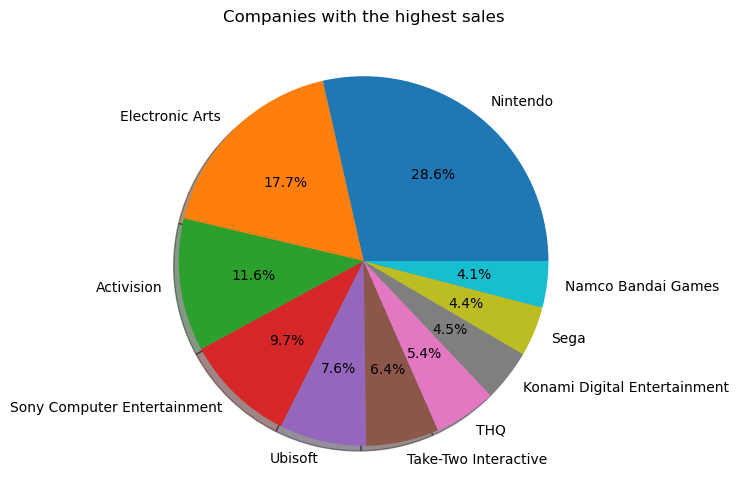

In [18]:
plt.figure(figsize=(10,6))
plt.pie(df2["Global_Sales"][:10], labels= df2["Publisher"][:10], shadow= True, autopct='%1.1f%%')
plt.title("Companies with the highest sales")
plt.show()

## Conclusions

- Nintendo is the gaming company with the highest sales by 28.6%

## Mission 2: Which region that brings the biggest sales?

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [44]:
df[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].max().reset_index()

,index,0
0,NA_Sales,41.49
1,EU_Sales,29.02
2,JP_Sales,10.22
3,Other_Sales,10.57


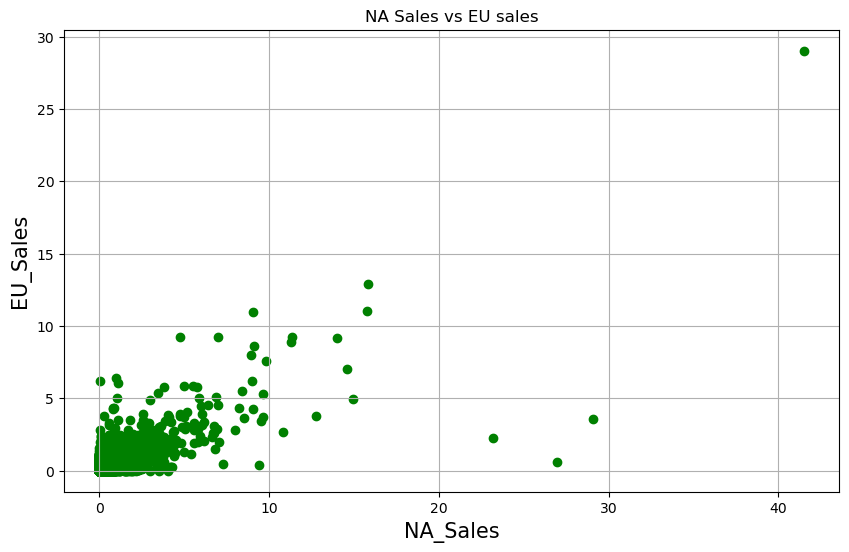

In [78]:
plt.figure(figsize=(10,6))
plt.scatter(df["NA_Sales"], df["EU_Sales"], color="green")
plt.grid()
plt.xlabel("NA_Sales", size= 15)
plt.ylabel("EU_Sales", size= 15)
plt.title("NA Sales vs EU sales")
plt.show()

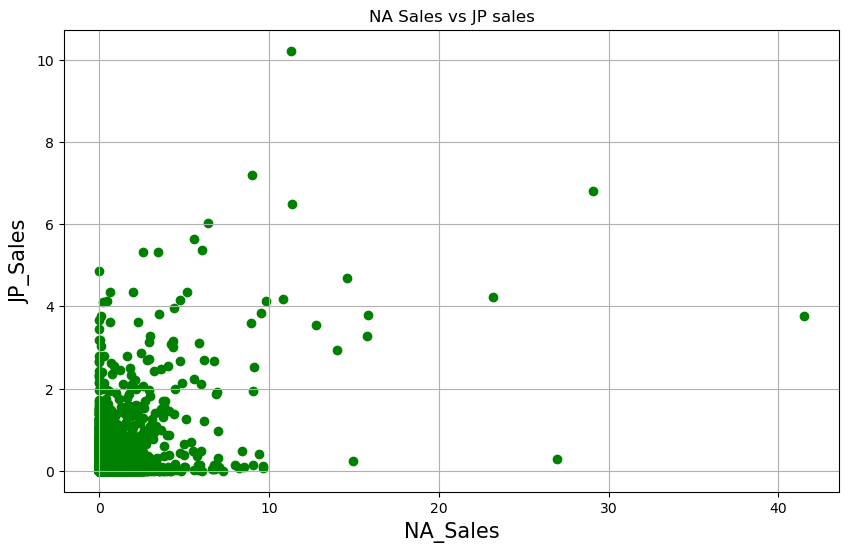

In [76]:
plt.figure(figsize=(10,6))
plt.scatter(df["NA_Sales"], df["JP_Sales"], color="green")
plt.grid()
plt.xlabel("NA_Sales", size= 15)
plt.ylabel("JP_Sales", size= 15)
plt.title("NA Sales vs JP sales")
plt.show()

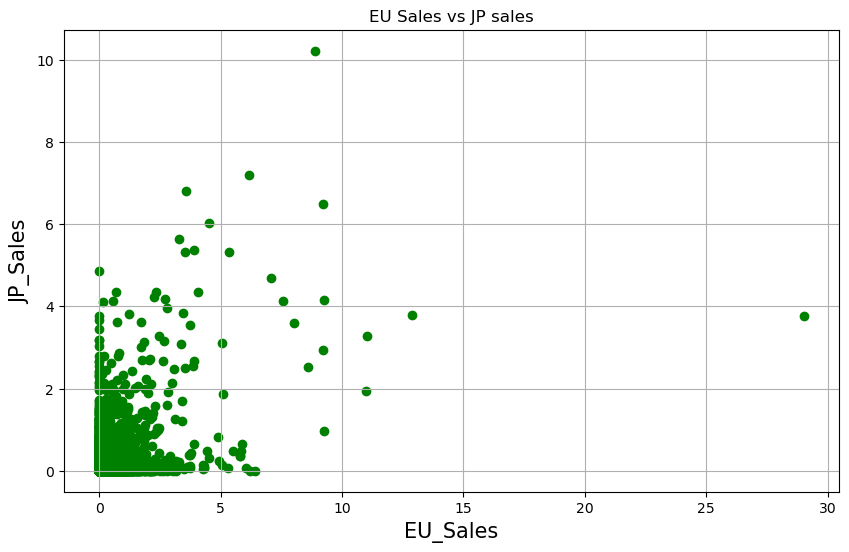

In [74]:
plt.figure(figsize=(10,6))
plt.scatter(df["EU_Sales"], df["JP_Sales"], color="green")
plt.grid()
plt.xlabel("EU_Sales", size= 15)
plt.ylabel("JP_Sales", size= 15)
plt.title("EU Sales vs JP sales")
plt.show()

## We notice that:

- There's a huge outlier from the graphs, we see that North American sales peaked at 41.49 million dollars in comparison to the EU where its higher sales peaked at 29.02 million dollars.
- But both of them have higher sales than Japan and other regions.

## Conclusions:

- North America is a very huge market for video games making it the most bankable and profitable market in the world of video games.
- Same thing for the European union.
- Japan while it's important in the gaming landscape, has lower sales than both North America and EU

## Mission 3: What is the highest selling video game?

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [75]:
df3 = df[["Global_Sales", "Name", "Year", "Platform", "Publisher"]].sort_values(by="Global_Sales", ascending= False)

In [77]:
df3

,Global_Sales,Name,Year,Platform,Publisher
6113,82.74,Wii Sports,2006.0,Wii,Nintendo
122,40.24,Super Mario Bros.,1985.0,NES,Nintendo
8323,35.82,Mario Kart Wii,2008.0,Wii,Nintendo
9751,33.00,Wii Sports Resort,2009.0,Wii,Nintendo
705,31.37,Pokemon Red/Pokemon Blue,1996.0,GB,Nintendo
...,...,...,...,...,...
12432,0.01,Akatsuki no Amaneka to Aoi Kyojin,2010.0,PSP,CyberFront
12433,0.01,John Daly's ProStroke Golf,2010.0,X360,O-Games
12434,0.01,Wand of Fortune: Mirai e no Prologue,2010.0,PS2,Idea Factory
12435,0.01,Tenjin Ranman: Happy GO Lucky!!,2010.0,PSP,Russel


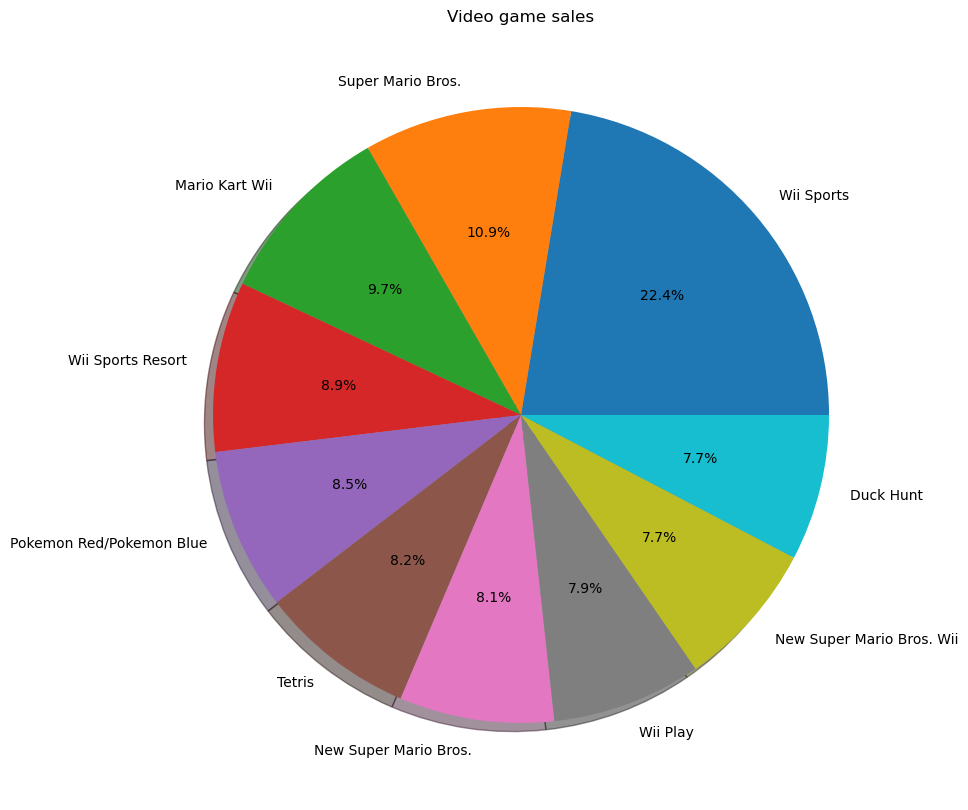

In [85]:
plt.figure(figsize=(14,10))
plt.pie(df3["Global_Sales"][:10],labels=df3["Name"][:10] ,shadow= True, autopct="%1.1f%%")
plt.title("Video game sales")
plt.show()

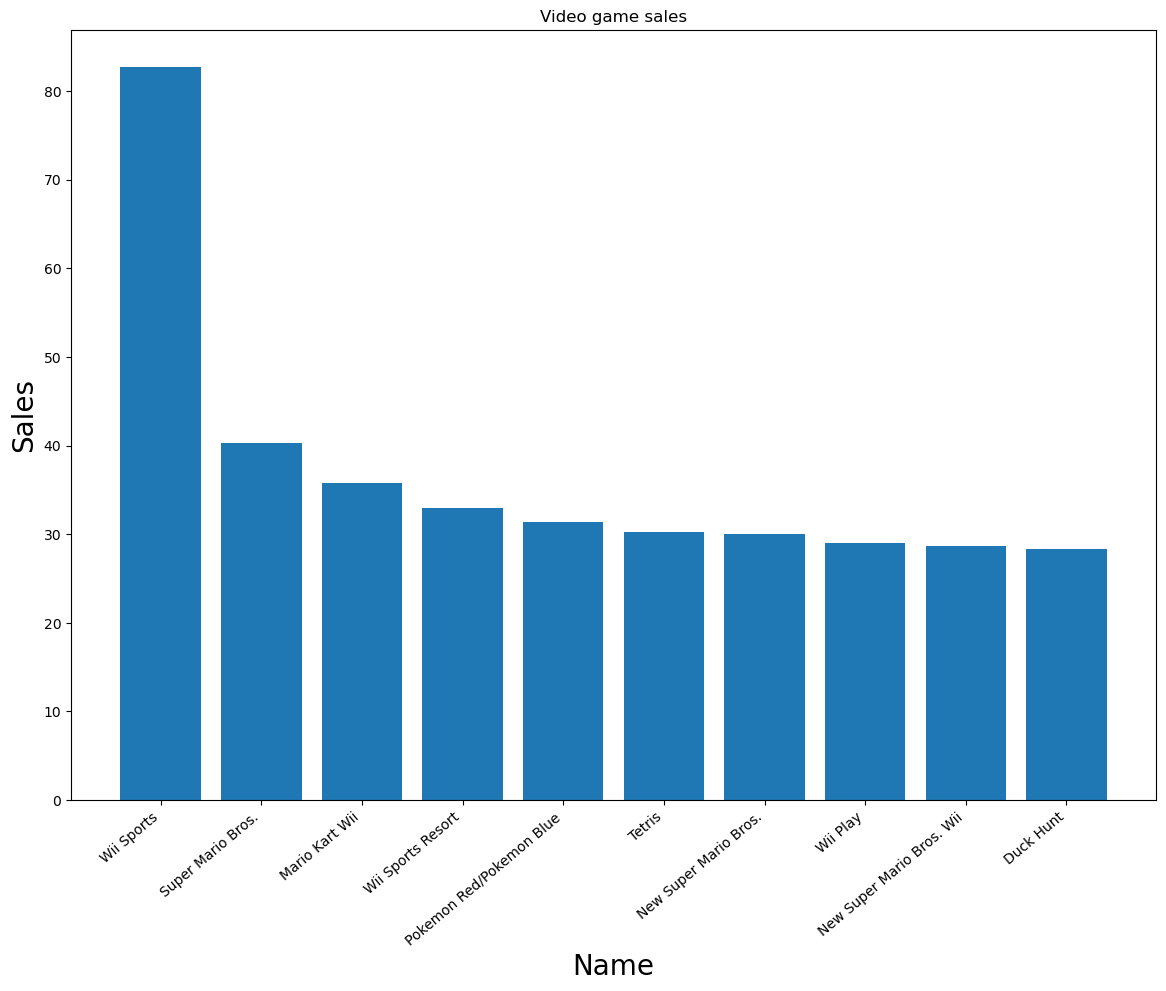

In [203]:
plt.figure(figsize=(14,10))
plt.bar(df3["Name"][:10], df3["Global_Sales"][:10])
plt.xlabel("Name", size=20)
plt.ylabel("Sales", size=20)
plt.xticks(rotation = 40 ,ha="right")
plt.title("Video game sales")
plt.show()

In [81]:
df3.head(10)

,Global_Sales,Name,Year,Platform,Publisher
6113,82.74,Wii Sports,2006.0,Wii,Nintendo
122,40.24,Super Mario Bros.,1985.0,NES,Nintendo
8323,35.82,Mario Kart Wii,2008.0,Wii,Nintendo
9751,33.00,Wii Sports Resort,2009.0,Wii,Nintendo
705,31.37,Pokemon Red/Pokemon Blue,1996.0,GB,Nintendo
188,30.26,Tetris,1989.0,GB,Nintendo
6114,30.01,New Super Mario Bros.,2006.0,DS,Nintendo
6115,29.02,Wii Play,2006.0,Wii,Nintendo
9752,28.62,New Super Mario Bros. Wii,2009.0,Wii,Nintendo
108,28.31,Duck Hunt,1984.0,NES,Nintendo


# Conclusions

- Wii sports is the highest selling game of all time.
- the top 10 most sold games are all developed by nintendo, which means that nintendo as we have seen from a previous graph is the company with the highest sales from video games.

## Mission 4: What is the most sold game in Japan?

In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [153]:
df4 = df[["JP_Sales", "Name"]].sort_values(by="JP_Sales", ascending= False)

In [155]:
df4

,JP_Sales,Name
705,10.22,Pokemon Red/Pokemon Blue
1636,7.20,Pokemon Gold/Pokemon Silver
122,6.81,Super Mario Bros.
6114,6.50,New Super Mario Bros.
6116,6.04,Pokemon Diamond/Pokemon Pearl
...,...,...
6523,0.00,Scarface: Money. Power. Respect.
6525,0.00,World Series of Poker: Tournament of Champions...
6526,0.00,Field Commander
6531,0.00,Blitz: The League


In [157]:
df4.head(10)

,JP_Sales,Name
705,10.22,Pokemon Red/Pokemon Blue
1636,7.20,Pokemon Gold/Pokemon Silver
122,6.81,Super Mario Bros.
6114,6.50,New Super Mario Bros.
6116,6.04,Pokemon Diamond/Pokemon Pearl
11183,5.65,Pokemon Black/Pokemon White
2806,5.38,Pokemon Ruby/Pokemon Sapphire
5176,5.33,Animal Crossing: Wild World
5175,5.32,Brain Age 2: More Training in Minutes a Day
11198,4.87,Monster Hunter Freedom 3


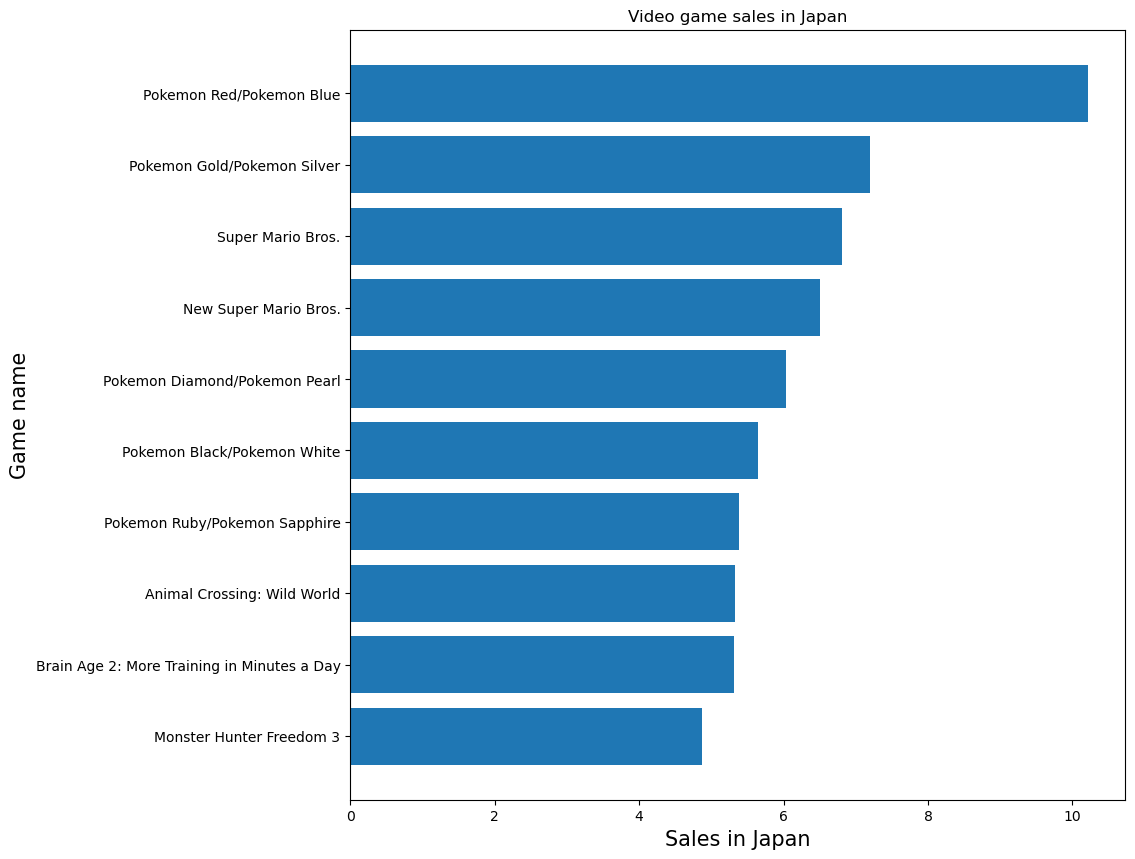

In [190]:
plt.figure(figsize=(10,10))
plt.barh(df4["Name"][:10], df4["JP_Sales"][:10])
plt.xlabel("Sales in Japan", size= 15)
plt.ylabel("Game name", size= 15)
plt.title("Video game sales in Japan")
plt.gca().invert_yaxis()
plt.show()

## Conclusion

- The pokemon and super mario game franchises are the best selling-game franchises in Japan, they are both made by Nintendo, a Japanese game company.
- Both of them have expanded beyond video games.
- The top 10 games sold in Japan have 1 thing in common: they focus on exploration, social interaction.

## Mission 5: What is the most sold game in North America?

In [206]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [10]:
df5 = df[["NA_Sales", "Name"]].sort_values(by="NA_Sales", ascending= False)

In [12]:
df5

,NA_Sales,Name
6113,41.49,Wii Sports
122,29.08,Super Mario Bros.
108,26.93,Duck Hunt
188,23.20,Tetris
8323,15.85,Mario Kart Wii
...,...,...
9732,0.00,Summer Athletics
9730,0.00,Bomberman
9728,0.00,Captain Rainbow
9727,0.00,Help Wanted: 50 Wacky Jobs (jp sales)


In [14]:
df5.head(10)

,NA_Sales,Name
6113,41.49,Wii Sports
122,29.08,Super Mario Bros.
108,26.93,Duck Hunt
188,23.20,Tetris
8323,15.85,Mario Kart Wii
9751,15.75,Wii Sports Resort
11182,14.97,Kinect Adventures!
9752,14.59,New Super Mario Bros. Wii
6115,14.03,Wii Play
205,12.78,Super Mario World


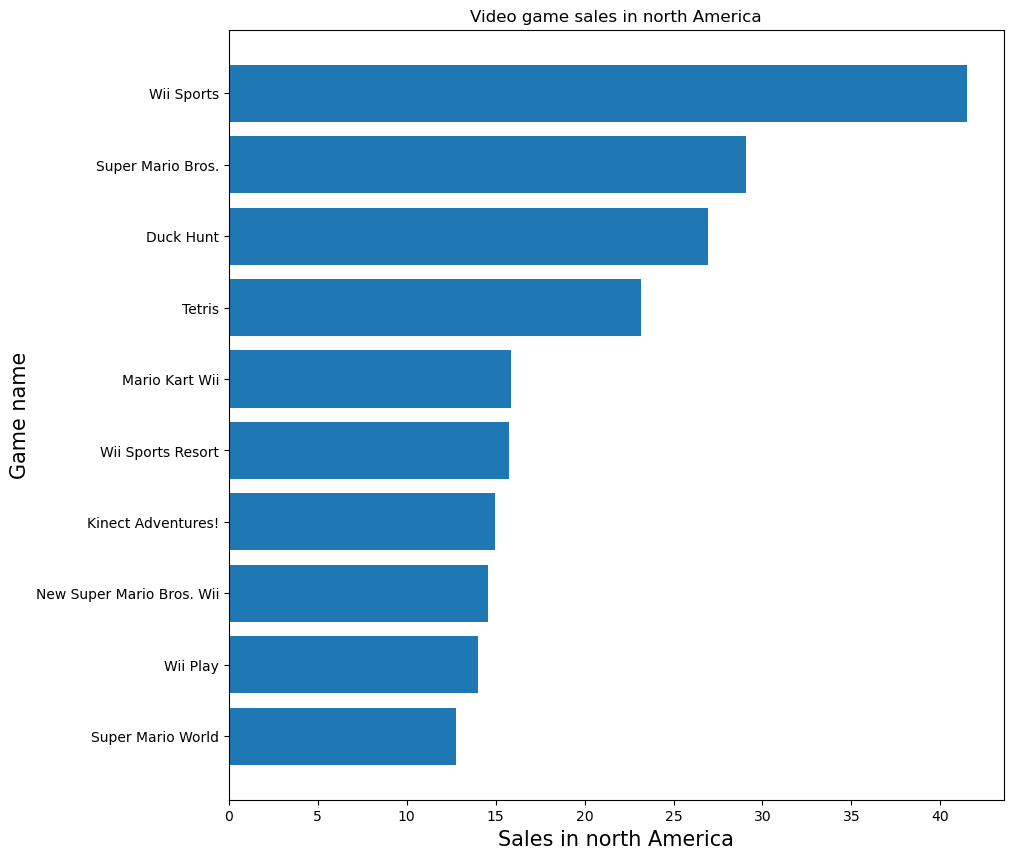

In [24]:
plt.figure(figsize=(10,10))
plt.barh(df5["Name"][:10], df5["NA_Sales"][:10])
plt.ylabel("Game name", size=15)
plt.xlabel("Sales in north America", size=15)
plt.title("Video game sales in north America")
plt.gca().invert_yaxis()
plt.show()

## Conclusions

- Wii sports is the most sold game in north America.
- The top 10 most sold games in north America have 1 thing in common: they focus on quick reflexes and adventure which fills the Americans' appetite for adventure, action and excitement.

## Mission 6: What is the most sold game in the European union?

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [64]:
df6 = df[["EU_Sales", "Name"]].sort_values(by="EU_Sales", ascending= False)

In [66]:
df6.head(10)

,EU_Sales,Name
6113,29.02,Wii Sports
8323,12.88,Mario Kart Wii
9751,11.01,Wii Sports Resort
5172,11.00,Nintendogs
14237,9.27,Grand Theft Auto V
5174,9.26,Brain Age: Train Your Brain in Minutes a Day
6114,9.23,New Super Mario Bros.
6115,9.20,Wii Play
705,8.89,Pokemon Red/Pokemon Blue
9753,8.59,Wii Fit Plus


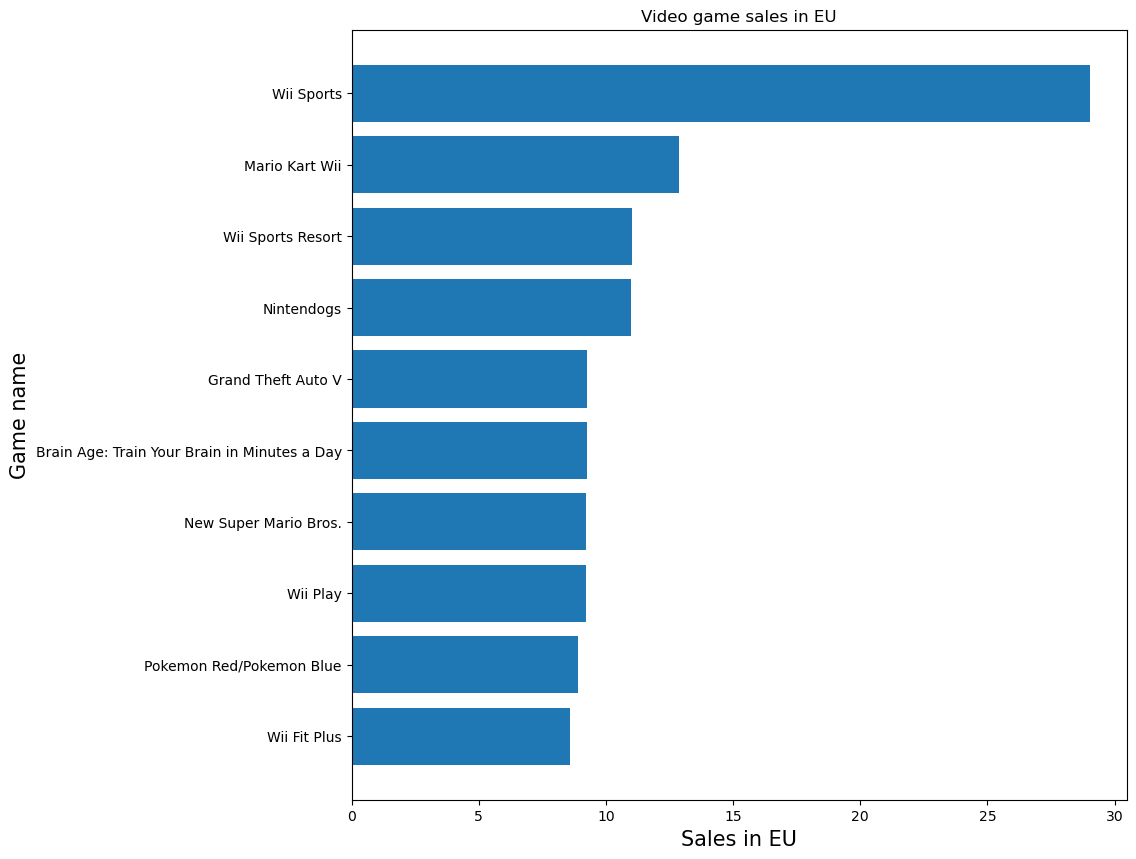

In [72]:
plt.figure(figsize=(10,10))
plt.barh(df6["Name"][:10], df6["EU_Sales"][:10])
plt.xlabel("Sales in EU", size=15)
plt.ylabel("Game name", size=15)
plt.title("Video game sales in EU")
plt.gca().invert_yaxis()
plt.show()

## Conculsions

- Just like North America, the EU prefers games that focus on motion, quick reflexes, action, adventure.

## Mission 7: What is the most sold game in other countries??

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [23]:
df7 = df[["Other_Sales", "Name"]].sort_values(by="Other_Sales", ascending= False)

In [25]:
df7.head(10)

,Other_Sales,Name
4409,10.57,Grand Theft Auto: San Andreas
6113,8.46,Wii Sports
4410,7.53,Gran Turismo 4
14237,4.14,Grand Theft Auto V
8323,3.31,Mario Kart Wii
9751,2.96,Wii Sports Resort
7152,2.93,Pro Evolution Soccer 2008
6114,2.90,New Super Mario Bros.
6115,2.85,Wii Play
5172,2.75,Nintendogs


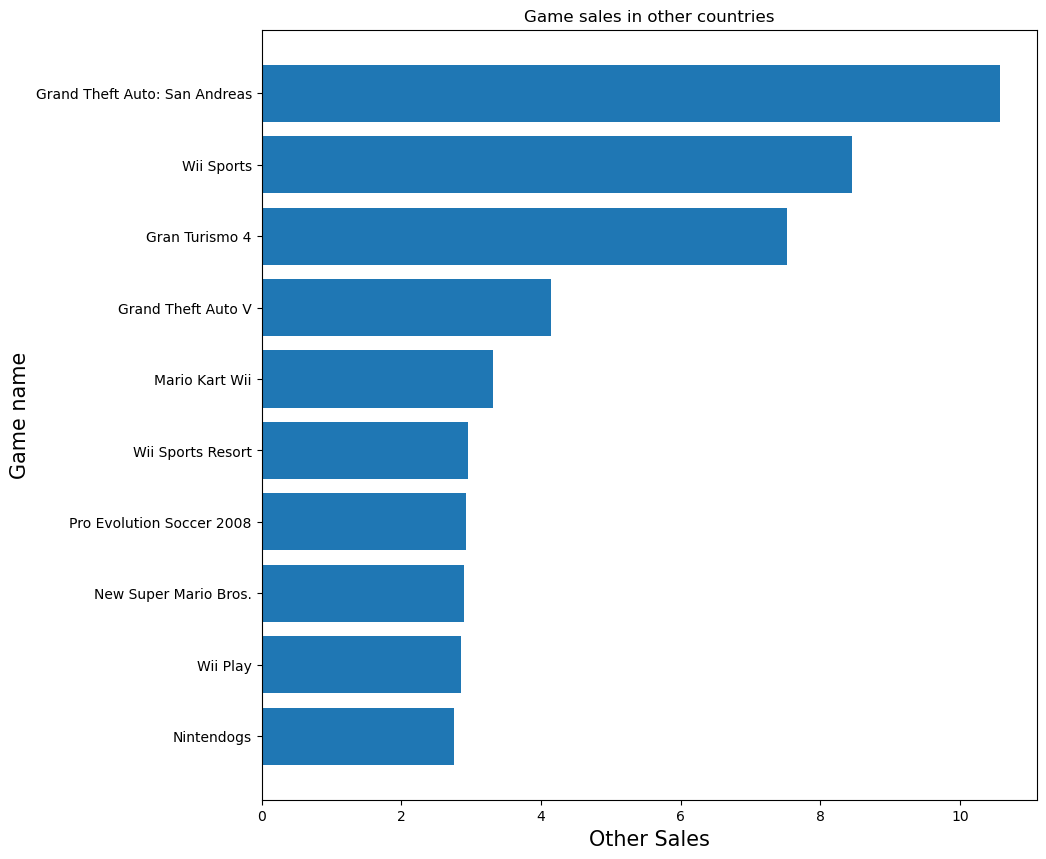

In [14]:
plt.figure(figsize=(10, 10))
plt.barh(df7["Name"][:10], df7["Other_Sales"][:10])
plt.xlabel("Other Sales", size=15)
plt.ylabel("Game name", size=15)
plt.title("Game sales in other countries")
plt.gca().invert_yaxis()
plt.show()

## Conclusions

- GTA san andreas is the most sold game abroad, 6 times higher than GTA 5.
- it's the most moddable game on the PC platform.
- It's not a surprise that this game is popular in the middle east region.

## Mission 8: What is the genre with the highest sales?

In [37]:
df8 = df.groupby("Genre")["Global_Sales"].sum().reset_index()

In [45]:
df9 = df8.sort_values(by="Global_Sales", ascending= False)

In [47]:
df9

,Genre,Global_Sales
0,Action,1751.18
10,Sports,1330.93
8,Shooter,1037.37
7,Role-Playing,927.37
4,Platform,831.37
3,Misc,809.96
6,Racing,732.04
2,Fighting,448.91
9,Simulation,392.20
5,Puzzle,244.95


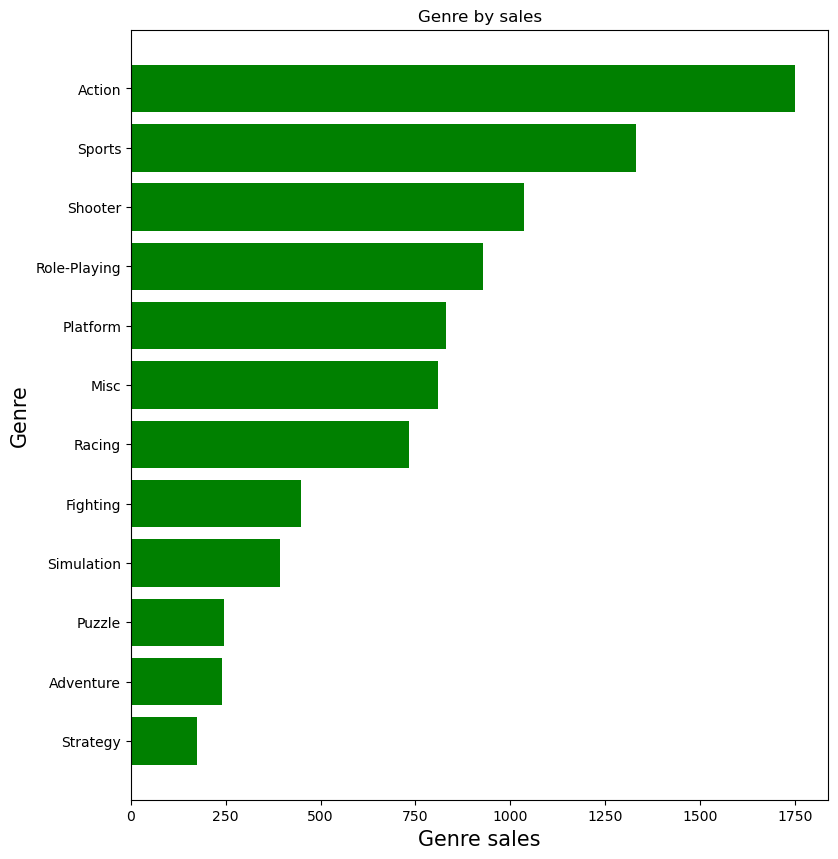

In [65]:
plt.figure(figsize=(9, 10))
plt.barh(df9["Genre"], df9["Global_Sales"], color="green")
plt.xlabel("Genre sales", size=15)
plt.ylabel("Genre", size=15)
plt.gca().invert_yaxis()
plt.title("Genre by sales")
plt.show()

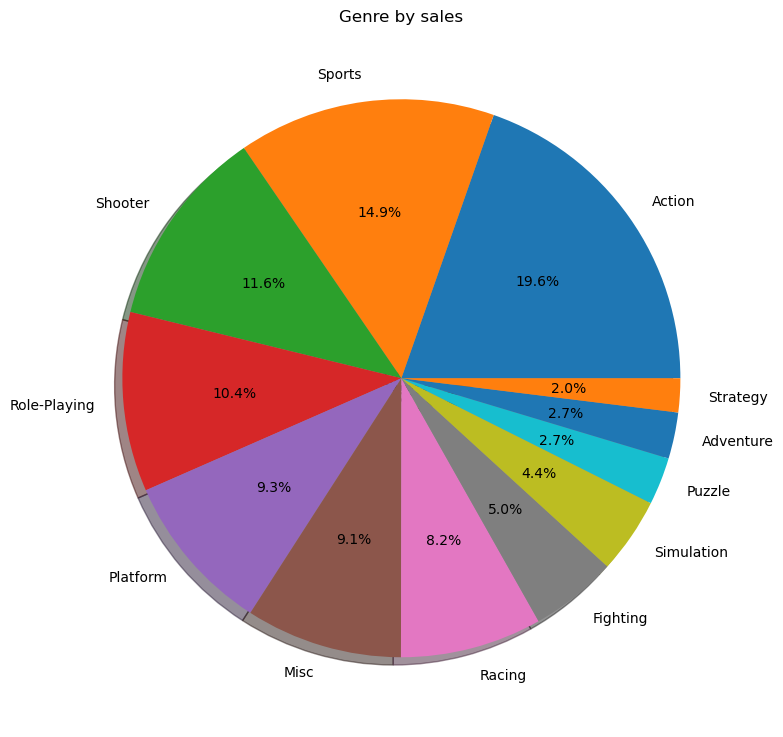

In [61]:
plt.figure(figsize=(9, 10))
plt.pie(df9["Global_Sales"], labels=df9["Genre"], shadow= True, autopct="%1.1f%%")
plt.title("Genre by sales")
plt.show()

## Conclusions

- Action, sports, shooter genres are the best-selling game genres of all time.
- It seems a lot of gamers prefer games that focus on quick reflexes, motion, action, adventure, excitement.
- This statistics aligns with the trend that fast paced games grant high sales.
- For Example: GTA 5 and GTA san andreas are the best selling games around the globe due to its fast pace, freedom to do what you want, variety of missions and activities.

## Mission 9: What year that has the best sales?

In [70]:
df10 = df.groupby("Year")["Global_Sales"].sum().reset_index()

In [72]:
df11 = df10.sort_values(by="Global_Sales", ascending= False)

In [76]:
df11.head(10)

,Year,Global_Sales
28,2008.0,678.90
29,2009.0,667.30
27,2007.0,611.13
30,2010.0,600.45
26,2006.0,521.04
31,2011.0,515.99
25,2005.0,459.94
24,2004.0,419.31
22,2002.0,395.52
33,2013.0,368.11


In [112]:
df11["Year"] = df11["Year"].astype("int")

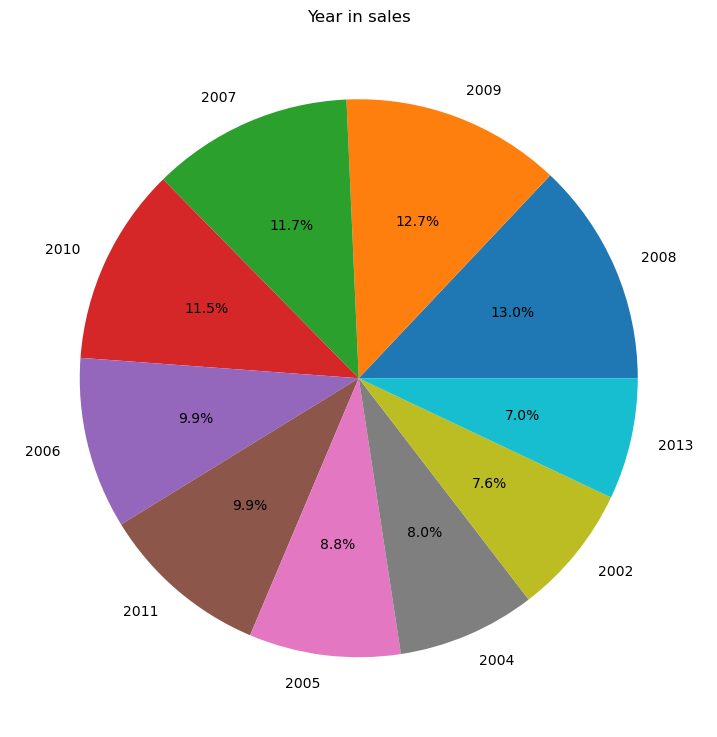

In [114]:
plt.figure(figsize=(9, 10))
plt.pie(df11["Global_Sales"][:10], labels= df11["Year"][:10], autopct= "%1.1f%%")
plt.title("Year in sales")
plt.show()

## Conclusions

- 2008 is the year with the best selling games, it's strange since this is the year in which the global financial crisis happened, a lot of people lost their jobs and gaming is an escapism from reality.

## Mission 10: 2008 is the year with the best sellin game , what genre in that year had the best selling titles? and what was the best selling game in that year?

In [226]:
df12 = df.loc[df["Year"] == 2008, ["Name", "Global_Sales", "Genre", "Platform"]]

In [228]:
df12.head(30)

,Name,Global_Sales,Genre,Platform
8323,Mario Kart Wii,35.82,Racing,Wii
8324,Super Smash Bros. Brawl,13.04,Fighting,Wii
8325,Grand Theft Auto IV,11.02,Action,X360
8326,Grand Theft Auto IV,10.57,Action,PS3
8327,Pokémon Platinum Version,7.84,Role-Playing,DS
8328,Call of Duty: World at War,7.37,Shooter,X360
8329,Gears of War 2,6.76,Shooter,X360
8330,Metal Gear Solid 4: Guns of the Patriots,6.03,Action,PS3
8331,LittleBigPlanet,5.92,Platform,PS3
8332,Monster Hunter Freedom Unite,5.50,Role-Playing,PSP


In [208]:
df13 = df12.groupby("Genre")["Global_Sales"].sum().reset_index()

In [214]:
df13

,Genre,Global_Sales
0,Action,136.39
1,Adventure,25.02
2,Fighting,35.38
3,Misc,87.03
4,Platform,35.70
5,Puzzle,15.59
6,Racing,70.66
7,Role-Playing,59.83
8,Shooter,59.51
9,Simulation,46.76


In [216]:
df14 = df13.sort_values(by="Global_Sales", ascending= False)

In [220]:
df14

,Genre,Global_Sales
0,Action,136.39
10,Sports,95.34
3,Misc,87.03
6,Racing,70.66
7,Role-Playing,59.83
8,Shooter,59.51
9,Simulation,46.76
4,Platform,35.70
2,Fighting,35.38
1,Adventure,25.02


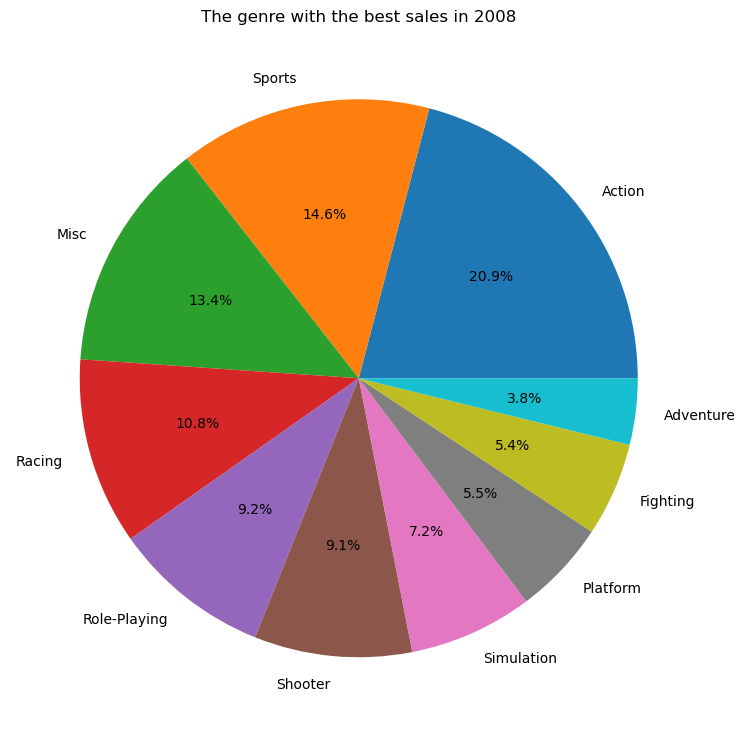

In [222]:
plt.figure(figsize=(9, 10))
plt.pie(df14["Global_Sales"][:10], labels=df14["Genre"][:10], autopct="%1.1f%%")
plt.title("The genre with the best sales in 2008")
plt.show()

## Conclusions:

- The Action genre has the best selling games in 2008 by 20%, that means a lot of gamers prefer games that focuses on quick reflexes, offers action set pieces and epic moments , fast-paced gameplay.
- Sports (14%), misc(13%) and racing(10%) genres have also the best selling games, like action games they focus on quick reflexes, fast paced gameplay.
- RPG(9.2%) genre has lower sales, this genre is not for everyone, it requires extensive time investment and people in times of crisis require stuff that offers quick enjoyment.

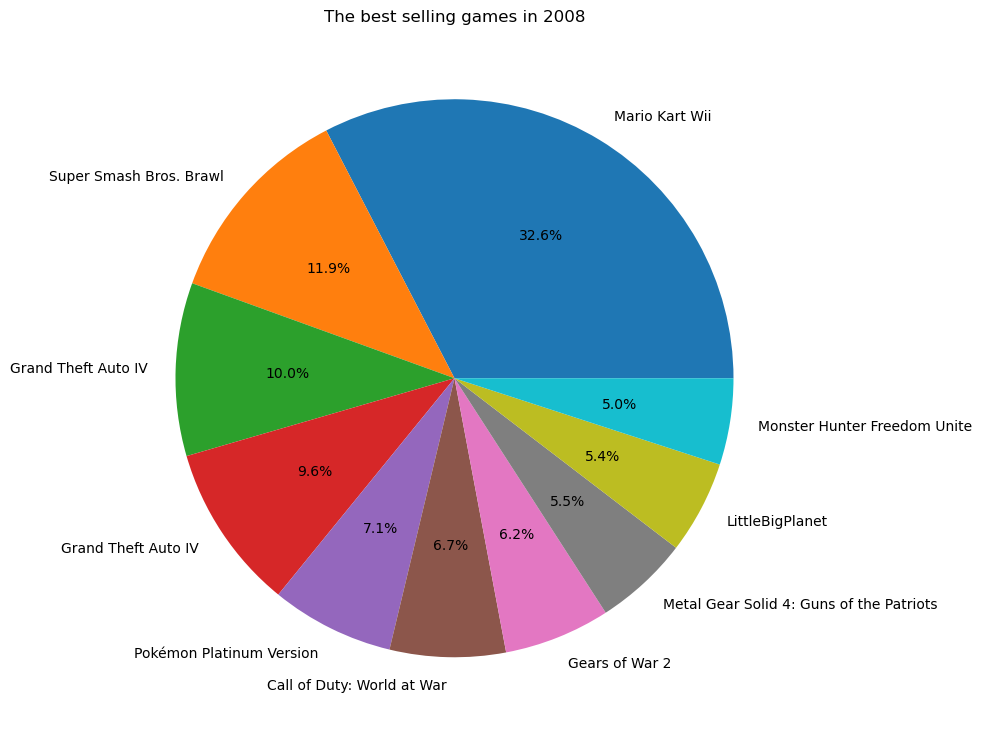

In [170]:
plt.figure(figsize=(9, 10))
plt.pie(df12["Global_Sales"][:10], labels=df12["Name"][:10], autopct="%1.1f%%")
plt.title("The best selling games in 2008")
plt.show()

## Conclusions:

- Mario kart wii along with Super smash bros brawl and GTA 4 (Xbox 360 and Ps3) are the best selling games in 2008.
- These games offer one thing in common: they offer escapism from reality, be it the fast paced racing of mario kari Wii, or the fast paced fighting of super smash bros brawl, or the freedom of GTA 4.

## Mission 11: What platform has the best selling games?

In [45]:
df[["Platform", "Global_Sales", "Name"]].max()

Platform                                XOne
Global_Sales                           82.74
Name            ¡Shin Chan Flipa en colores!
dtype: object

In [51]:
df15 = df.groupby("Platform")["Global_Sales"].sum().reset_index()

In [53]:
df16 = df15.sort_values(by="Global_Sales", ascending= False)

In [63]:
df16.head(10)

,Platform,Global_Sales
16,PS2,1255.64
28,X360,979.96
17,PS3,957.84
26,Wii,926.71
4,DS,822.49
15,PS,730.66
6,GBA,318.50
19,PSP,296.28
18,PS4,278.10
13,PC,258.82


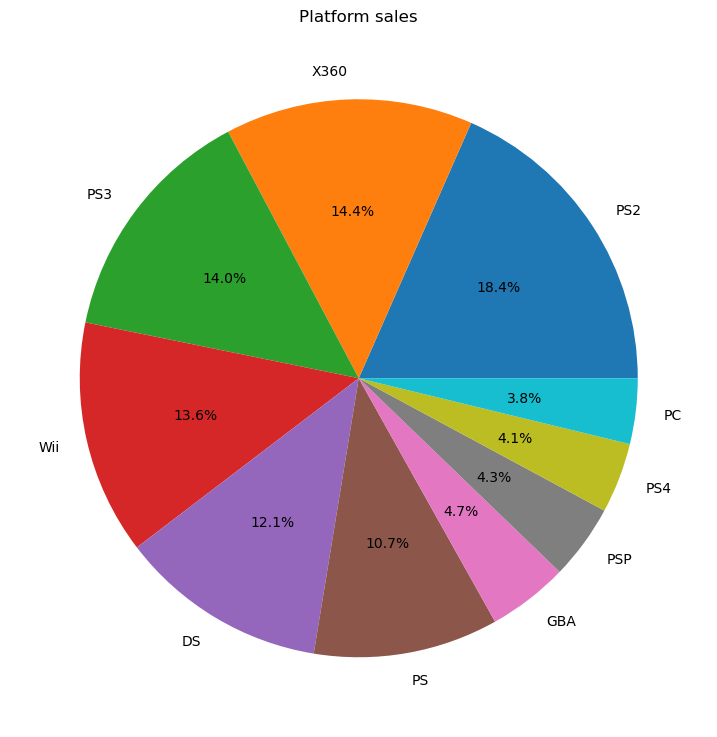

In [67]:
plt.figure(figsize=(9, 10))
plt.pie(df16["Global_Sales"][:10], labels=df16["Platform"][:10], autopct="%1.1f%%")
plt.title("Platform sales")
plt.show()

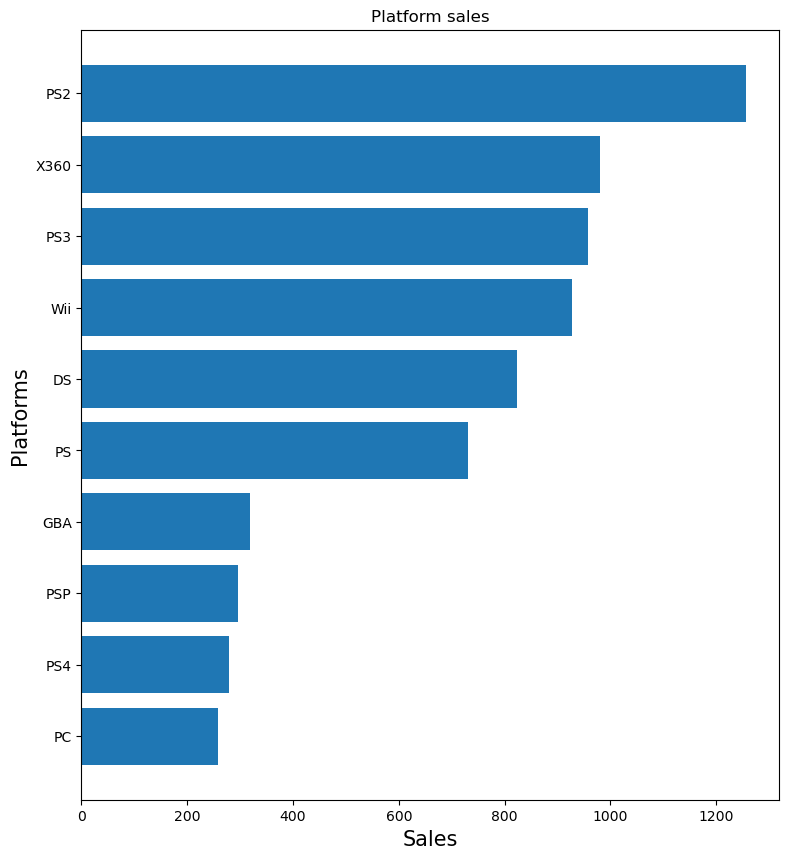

In [69]:
plt.figure(figsize=(9, 10))
plt.barh(df16["Platform"][:10], df16["Global_Sales"][:10])
plt.xlabel("Sales", size= 15)
plt.ylabel("Platforms", size= 15)
plt.gca().invert_yaxis()
plt.title("Platform sales")
plt.show()

## Conclusions:

- the PS2 is the best selling console of all time, it exceeds over 1.2 billion dollars.
- After it, the Xbox360 is the best selling console of the 6th generation of consoles alongside Ps3, Wii and Ds
- Altough PC has long longevity among all platforms, has lower sales than them, that shows that developing games on Pc is not as flexible as video game consoles and that console gaming remains dominant in terms of sales.